<a href="https://colab.research.google.com/github/gonzo1978/CAP4453/blob/main/5_ImageWarping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Every point on this homework must be solved with python code. You will show your code, your results, and make a clear statement of what is you answer. When questions are asked, you should answer them.
1. You will be applying a transformation on a set of points of the following image (18%).
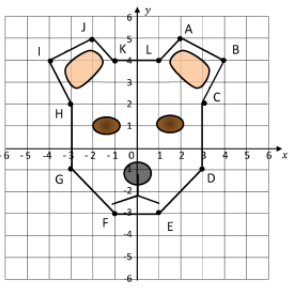
<br>
a) [2%] Find the matrix that represents a rotation of 20 degrees in homogeneous coordinates.<br>
b) [2%] Find the matrix  that represents a translation of 2 in X direction, 1 in y direction degrees in homogeneous coordinates.<br>
c) [2%] Plot the points that form the figure in the cartesian plane.<br>
d) [2%] Perform a rotation of 20 degrees on the points and plot them. <br>
e) [2%] Perform a translation  in x of 2 and a translation in y of 1 over the points previously rotated. Plot the new obtained points.<br>
f) [2%] Find a transform that represents the operation of rotation of 20 degrees followed by a rotation. Compare with the points on e) and verify with a plot the match.<br>
g) [2%] Defines a matrix that represents a translation of 2 in x and a translation of 1 in y, followed by a rotation of 20 degrees. Do the transformation over the initial set of points and compare them.<br> 
h) [2%] Are the matrices obtained in g) and f) the same? Why? Justify your answer.<br>
i) [2%] Compute the inverse matrix of the transformation obtained in g). Apply such transformation over the set of points obtained in g). Do the new points match the original points? show plots to verify it.<br>



In [ ]:
#import needed libraries
import numpy as np
import matplotlib.pyplot as plt

tetadeg =20

#convert to radians
teta=np.pi*tetadeg /180
tx=2
ty=1

# define your points as homogeneuos coordinates (3 coordinates).
points = np.array([[2,5,1],[4,4,1],[3,2,1],[3,-1,1],[1,-3,1],[-1,-3,1],[-3,-1,1],[-3,2,1],[-4,4,1],[-2,5,1],[-1,4,1],[1,4,1]])

# Make the points be in columns (you need to transpose them)


# define your rotation matrix here:
#R= np.array([[XX, XX, XX],[XX, XX, XX],[XX,XX,XX]])


# set up your plot
fig, ax = plt.subplots(1)
ax.clear()
ax.grid(True)
ax.set_aspect('equal')
ax.axhline(0, color='blue')   #draw x axis
ax.axvline(0, color='blue')   #draw y axis

# Plot original points to see everything looks correct
ax.plot(points[0,:],points[1,:],'r*')

# do the roation
#np.matmul
#plt.plot(rotPoints[0,:],rotPoints[1,:],'bo')
plt.title('Original and rotated')
plt.show()


# define your translation matrix here:
#R= np.array([[XX, XX, XX],[XX, XX, XX],[XX,XX,XX]])

# translation + rotation
fig, ax = plt.subplots(2)
fig.suptitle('Rotation then translation')
#subplot 1
ax[0].clear()
ax[0].grid(True)
ax[0].axhline(0, color='blue')
ax[0].axvline(0, color='blue')
ax[0].set_aspect('equal')

#subplot 2
ax[1].clear()
ax[1].grid(True)
ax[1].axhline(0, color='blue')
ax[1].axvline(0, color='blue')
ax[1].set_aspect('equal')

# Compute translation over your rotated points
#np.matmul
#ax[0].plot(tRotPoints[0,:],tRotPoints[1,:],'g*')

# compute your rotation and translation matrix
#tR = np.matmul
# Transform your points
#tRotPoints3 = np.matmul(tR, points)

#plot points
#ax[1].plot(tRotPoints3[0,:],tRotPoints3[1,:],'y+')
#plt.show()


# complete a) to g)



2. In this point you will be doing forward warping of an image and will be implementing a nearest neighbor interpolation on the following image. (Available [here](http://www.cs.ucf.edu/~gvaca/teaching/CAP4453-Fall2021/homeworks/hw5/) )<br>
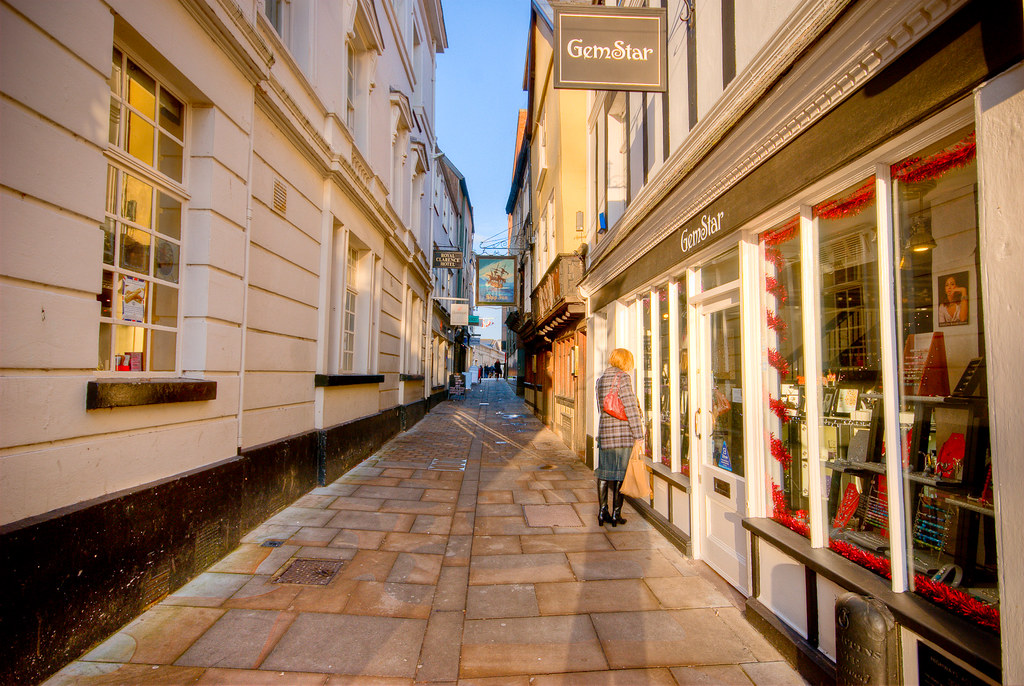
a) [10%] Implement forward warping of the grid points for the homography matrix: <br>
H=[[-2.90978069e+00,  3.54859237e-02,  1.70029144e+03],<br>
  [-6.48857919e-01, -8.36844934e-01,  6.24249500e+02],<br>
 [-2.10617311e-03,  8.27414761e-06,  1.00000000e+00]]<br>
 <br> 
 b) [2%]Visualize the obtained warped image in the range from 0 to 1000 in x and y.<br>
 c) [2%]comment about the appereance of the image. Does the image have gaps?<br>
 d) [5%] How the warping looks in regions where outside the [0-1000 pixels in x,y]<br>
 e) [10%] Implement a forward  nearest neighbor interpolation in the warped image<br>
 f) [3%]Visualize the interpolated image. <br>
 g) [2%] comment about the appereance of the interpolated image versus the initially warped image.



In [ ]:
# load an image to warp

# in local machine
#import cv2
#img = cv2.imread('C:/Users/gonza/OneDrive/Teaching/CAP4453/homeworksolutions/img2warp.jpg')


# image available at: http://www.cs.ucf.edu/~gvaca/teaching/CAP4453-Fall2021/homeworks/hw5/
from skimage import io
img = = io.imread(url)

# the values that can take y
i = np.linspace(0, img.shape[0]-1, img.shape[0]).astype(int)
# the values that can take x
j = np.linspace(0, img.shape[1]-1, img.shape[1]).astype(int)
# combination of values that can take x, and y in a grid
yv, xv = np.meshgrid(i, j)

# nimber of points on the grid
numpoints = xv.ravel().shape[0]

# extract the color channels
r = img[yv.ravel(),xv.ravel(),0]
g = img[yv.ravel(),xv.ravel(),1]
b = img[yv.ravel(),xv.ravel(),2]

# Define Homography matrix 
H=np.array([[-2.90978069e+00,  3.54859237e-02,  1.70029144e+03],
 [-6.48857919e-01, -8.36844934e-01,  6.24249500e+02],
 [-2.10617311e-03,  8.27414761e-06,  1.00000000e+00]]
)

# all the values of x coordinates as a row
x_cord = xv.ravel().reshape((1,numpoints))
# all the values of y coordinates as a row
y_cord = yv.ravel().reshape((1,numpoints))

# define the homogeneous coordinates
grid = np.concatenate((x_cord, y_cord, np.ones((1,numpoints))),axis=0)

# transform the grid (your canvas) in the new coordinated determined by the homography defined below
#newgrid = np.matmul(FILL,FILL)

# Convert from homogeneous to heterogeneous coordinates
newgridHetero = newgrid[:2,:]   # the x, and y

thethirdcoordinate = newgrid[2,:]
# TO DO : complete the conversion. remember x=X/w
#newgridHetero[0,:]= COMPLETE IT
#newgridHetero[1,:]= COMPLETE IT


# define your new empty canvas (it will have -1 if is not defined)
warped = -np.ones((1001,1001,3)).astype(np.int16)

# Raw approximation. Considering just the integer values 
newgrid2= newgridHetero.round().astype(np.int64)

# only consider points that are in your area of interest (0 to 1000)
validsX=np.bitwise_and(newgrid2[0,:]>=0,newgrid2[0,:]<1000)
validsY=np.bitwise_and(newgrid2[1,:]>=0,newgrid2[1,:]<1000)
valids = np.bitwise_and(validsX,validsY)

# assign color to the pixels that are valids
warped[newgrid2[1,valids],newgrid2[0,valids],0]=r[valids]
# TO DO: ASSIGN the remaining colors
#
#


plt.imshow(warped)
plt.show()


# nearest Neighbor interpolation
# your new canvas
warped2 = np.zeros((1001,1001,3)).astype(np.uint8)
# Area where we look for closest valid assignation
area2check=5

# loop over the valid area of the warped image
for i in range(area2check,warped.shape[0]-area2check):
    for j in range(area2check,warped.shape[1]-area2check):
        # check if the pixel has a valid warped value        
        if warped[i,j,0]==-1:  #need to look for neighbor
            distance = area2check*area2check+1  # assign a distance larger than any that can be found in the area to check
            
            # loop over all the possible neighbors
            for k in range(i-area2check,i+area2check):
                for l in range(j-area2check,j+area2check):
                    distancetested = (abs(k-i)+abs(l-j))  # L1 distance
                    if warped[k,l,0]>=0 and distancetested<distance:    # found a warped point , and it is closest
                        distance=distancetested
                        warped2[i,j]=warped[k,l]
        else:  #assign the valid warping
            warped2[i,j] =warped[i,j]
            
        
plt.imshow(warped2)
plt.show()



3. Write a function of the form (10%):

 

>> imwarped = warpImage(im,H,limit_coordinates)

 

where im is the input image to be warped, H is the homography, and limit_coordinates defines the limits (xmin,xmax,ymin,ymax) of the warped image.  


In [ ]:
def  warpImage(im,H,limit_coordinates):
  # your function goes here

<br>

4. **Recover Homographies (10%)**.  Before you can warp your images into alignment, you need to recover the parameters of the transformation between each pair of images.  
In our case, the transformation is a homography: $p’=Hp$, 
where:
* $(p’,p)$ are pairs of corresponding points taken from the two images.  
* $H$ is a 3x3 matrix with 8 degrees of freedom (lower right corner is a scaling factor and can be set to 1;  $h_{2,2}  = 1$). <br>

Considering the matrix form below, <b>obtain an expression of the form $Ax=b$ if $h_{22} =1$ </b><br>

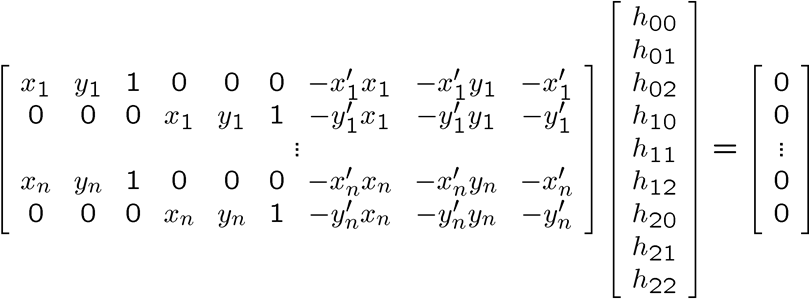
<br>
<b>Tip: if $h_{2,2}$ is 1, you can have 1 parameter less in the h vector and 1 column less in the matrix; b will not be zero anymore</b>
<br>
<br>
5. Write a python function using the expression obtained in the previous point with the following prototype (10%): <br>

>> H = computeH(im1_pts,im2_pts) <br>

> where im1_pts and im2_pts are n-by-2 matrices holding the (x,y) locations of n point correspondences from the two images and H is the recovered 3x3 homography matrix.  <br>
<br>






6. Test your functions. Select 4 points manually from the image in point 2. The cooresponding points will be your corner points in the new warped image (origin, top right, bottom right, bottom left). <br>
a) Compute a new homography matrix using function created in 5. (10%).<br>
b) Visualize the warped image using the function created in 3. (8%).<br>
<br>

**BONUS [50%] Stackable with other homeworks if your score overpass 100%**: 
Write a function of the form:

 
>> imwarped = warpImage(im,H)

 

where im is the input image to be warped and H is the homography.  

Use inverse warping (but remember that for inverse warping you will need to compute H in the right “direction”). 

Try to write the whole function without any loops. One thing you need to pay attention to is the size of the resulting image (you can predict the bounding box by piping the four corners of the image through H, or use extra input parameters).  Also pay attention to how you mark pixels which don’t have any values.

Utilizes bilinear interpolation to approximate non integer pixel positions.

